<a href="https://colab.research.google.com/github/Sergey-Kiselev-dev/ML_sem_pub/blob/main/ML_job_Izing_02c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kinetic Ising Models
===========
Ising model has no Hamiltonian given dynamics. For kinetics we assume that an associated heat bath generates spin flip  (Si→−Si)
 .

The kinetics can be

The spin system, which have a non-conserved kinetics. At the microscopic level, spin-flip Glauber model is used to describe the non-conserved kinetics of the paramagnetic to ferromagnetic transition

The binary (AB) mixture or Lattice Gas. The spin-exchange Kawasaki model is used to describe the conserved kinetics of binary mixtures at the microscopic level

Purely dissipative and stochastic models are ofter referred to as Kinetic Ising models.

At the coarse-grained level the respective order parameters,  ϕ(r⃗ ,t)
  are used to describe the dynamics.

Domain Growth with non-conserved kinetics
=====================
At  t=0,
  a paramagnetic phase is quenched below the critical temperature  Tc

The paramagnetic state is no longer the preferred equilibrium state

The far-from-equilibrium, homogeneous, state evolves towards its new equilibrium state by separating in domains.

These domains coarsen with time and are characterized by length scale  L(t)

A finite system becomes ordered in either of two equivalent states as  t→∞

The simplest kinetics Ising model for non-conserved scalar field  ϕ(r⃗ )
  is the time dependent Ginzburg-Landau (TDGL) model.

TDGL equation
=============
The equation of motion for  ϕ
  can be written as:

∂ϕ∂t=−ΓδFδϕ+θ(r⃗ ,t)

where  δFδϕ
  denotes functional derivative of free-energy functional

F(ϕ)=∫[aϕ2+bϕ4+12K(∇ϕ)2]

For  T<Tc
  we can write TDGL in terms of rescaled variables as

∂ϕ∂t=ϕ−ϕ3+∇2ϕ

In the next section we will simulate the TDGL equation.

In [1]:
# Simulating the TDGL equation
# This example uses the 5-point Laplacian discretization from
# [here](https://github.com/ketch/finite-difference-course)
#
%matplotlib inline
import numpy as np
from __future__ import division
from scipy.sparse import spdiags,linalg,eye
import matplotlib.pyplot as plt

In [2]:
a,b, k = 0, 1.0, 100.0
dh, dt = 1.0, 1e-3
Ng, Tf = 256, 10001

class TDGL():
    '''
    Class to solve a PDE
    '''
    def mu(self, u):
        return a*u + b*u*u*u

    def laplacian(self, Ng):
        '''Construct a sparse matrix that applies the 5-point Laplacian discretization'''
        e=np.ones(Ng**2)
        e2=([1]*(Ng-1)+[0])*Ng
        e3=([0]+[1]*(Ng-1))*Ng
        h=dh
        A=spdiags([-4*e,e2,e3,e,e],[0,-1,1,-Ng,Ng],Ng**2,Ng**2)
        A/=h**2
        return A

    def integrate(self, L, x, y, u):
        '''  simulates the equation and plots it at different instants '''

        f = plt.figure(figsize=(15, 15), dpi=80);

        for i in range(Tf):
            u = u - dt*(self.mu(u) - k*L.dot(u))

            if (i==0):      self.configPlot(x, y, u, f, 1, i);
            if (i==1):      self.configPlot(x, y, u, f, 2, i);
            if (i==10):     self.configPlot(x, y, u, f, 3, i);
            if (i==100):    self.configPlot(x, y, u, f, 4, i);
            if (i==1000):   self.configPlot(x, y, u, f, 5, i);
            if (i==10000):  self.configPlot(x, y, u, f, 6, i);

    def configPlot(self, x, y, u,f, n_, i):
        U= u.reshape((Ng, Ng))
        sp =  f.add_subplot(3, 3, n_ )
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)
        plt.pcolormesh(x,y,U, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i)
    plt.show()

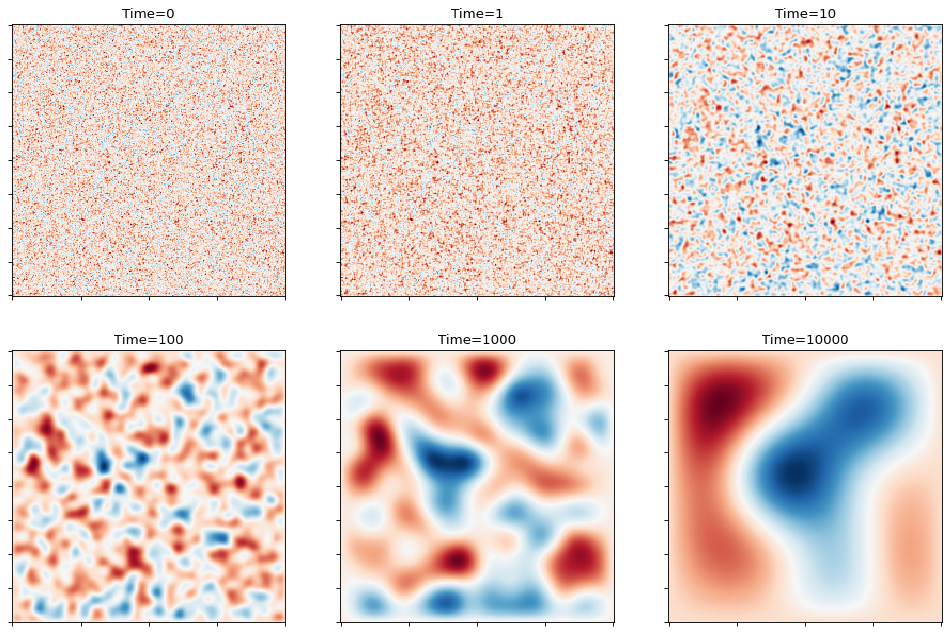

In [3]:
rm = TDGL()   # instantiate the class

# generate the grid and initialise the field
x = np.linspace(-1,1,Ng)
y = np.linspace(-1,1,Ng)
X, Y = np.meshgrid(x, y)

u=np.random.randn(Ng*Ng, 1);  # Initial data
L = rm.laplacian(Ng)         # construct the laplacian
rm.integrate(L, x, y, u)    # simulate

#simulation completed!!

Thus we see that time evolution of the Monte carlo simulation of the Ising model and that of the TDGL equation are similar. The TDGL equation is a hydrodynamic model while the simulation of the Ising model was done at the molecular level. We still see a similarity in the time evolution, as expected!